In [17]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
pre_IE50_reci = pd.read_pickle('/data/ana_pre_IE50Hz_reci')
pre_IE50_uni = pd.read_pickle('/data/ana_pre_IE50Hz_uni')
pre_IE50 = pd.read_pickle('/data/ana_pre_IE50Hz')

In [19]:
pre_IE50_reci

,Before,After,File name,elimi
4,"{'PPR': [[nan], [nan], [nan], [nan], [nan], [n...","{'PPR': [[0.864008411867], [0.599862875009], [...",2016072902,45
5,"{'PPR': [[nan], [0.852533592635], [0.918682127...","{'PPR': [[0.659544505951], [0.776028618866], [...",2017021501,12
6,"{'PPR': [[nan], [0.725135908131], [0.915149097...","{'PPR': [[0.864175229092], [0.923992477401], [...",2016092601,28
7,"{'PPR': [[0.690709404248], [0.576432570197], [...","{'PPR': [[0.725465816524], [0.791597161754], [...",2016091502,33
8,"{'PPR': [[0.875572408754], [0.962634620777], [...","{'PPR': [[0.782979529747], [0.844272082926], [...",2017052201,24


In [20]:
pre_IE50_uni

,Before,After,File name,elimi
0,"{'PPR': [[0.842328799793], [0.817033354844], [...","{'PPR': [[1.03222323614], [1.18164478998], [0....",2016072704,50
1,"{'PPR': [[0.792311470187], [1.02509588856], [n...","{'PPR': [[0.593310637344], [0.653890684742], [...",2017021501,32
2,"{'PPR': [[0.875471250679], [0.813153734038], [...","{'PPR': [[0.921805499317], [0.608724627909], [...",2016091403,30
3,"{'PPR': [[0.615197013101], [0.441674060862], [...","{'PPR': [[0.622102703769], [0.644206674013], [...",2017062202,50


/src/Patch_ana/Patch_ana/patch_pip.py:457: RuntimeWarning: Mean of empty slice
  if aft_resp.shape[0] < 52:
/src/Patch_ana/Patch_ana/patch_pip.py:472: RuntimeWarning: Mean of empty slice
  ave_ptl_ste = np.nanstd(ave_ptl_resp, axis=0) / np.sqrt(i)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


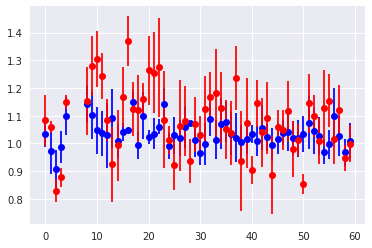

In [24]:
ave_ptl_resp = np.ones((len(pre_IE50_reci), 60))*np.nan

ave_ptl_mean_50reci,ave_ptl_ste_50reci = patch_pip.samp_ave(pre_IE50_reci, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50reci)), y=ave_ptl_mean_50reci, yerr=ave_ptl_ste_50reci, fmt='bo')

ave_ptl_resp = np.ones((len(pre_IE50_uni), 60))*np.nan
ave_ptl_mean_50uni,ave_ptl_ste_50uni = patch_pip.samp_ave(pre_IE50_uni, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50uni)), y=ave_ptl_mean_50uni, yerr=ave_ptl_ste_50uni, fmt='ro')


/src/Patch_ana/Patch_ana/patch_pip.py:457: RuntimeWarning: Mean of empty slice
  if aft_resp.shape[0] < 52:
/src/Patch_ana/Patch_ana/patch_pip.py:472: RuntimeWarning: Mean of empty slice
  ave_ptl_ste = np.nanstd(ave_ptl_resp, axis=0) / np.sqrt(i)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


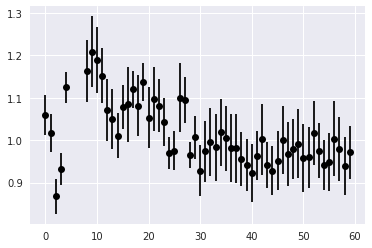

In [25]:
ave_ptl_resp = np.ones((len(pre_IE50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50 = patch_pip.samp_ave(pre_IE50, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ko')

[0, 60, 0.2, 2]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


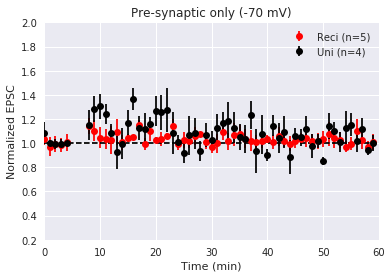

In [28]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50reci,ave_ptl_ste_50reci 
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ro', label='Reci (n={a})'.format(a=len(pre_IE50_reci)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50uni,ave_ptl_ste_50uni
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ko', label='Uni (n={a})'.format(a=len(pre_IE50_uni)))

plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Pre-synaptic only (-70 mV)')
plt.axis([0,60,0.2,2])